## Predictive Analytics and Modelling of Data Group Assessment

The below code aims to analyse and model the credit risk dataset to predict the customers who are likely to default on their credit. Various models have been implemented to identify the best fit for the provided dataset.

_Note: Please refer to the code titles and comments for brief explaination. Please run the cells one by one._

## 1) Data Description

Two files mentioned below were provided for analysis:  
"CS_data.txt": Raw data file comprising both training and testing data.  
"variable list.xls": File comprising the dataset documentation.  

The raw dataset comprised of 54 features and 50,000 records. It comprised of various attributes such as sex, marital status, personal monthly income, etc., which would help determine the characteristics of a defaulter, thus helping banks make data-driven decisions for approving/denying credit to a customer. 

## 2) Data Pre-processing

In [108]:
# Import common libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 2.1) Loading the dataset for analysis

In [109]:
data = pd.read_csv('CS_data.txt', sep = '\t')                         ## Read the data file for pre-processing

original_data = data.copy()                                           ## Create a copy of raw dataset for future reference

/tmp/ipykernel_140/635504441.py:1: DtypeWarning: Columns (52,53) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('CS_data.txt', sep = '\t')                         ## Read the data file for pre-processing


In [110]:
data.head()

,ID_CLIENT,CLERK_TYPE,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,EDUCATION_LEVEL,...,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,FLAG_ACSP_RECORD,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET_LABEL_BAD.1
1,1,C,-99999,0,0,1,F,6,1,NaN,...,0,0,0,0,1,N,32,595,595,1
2,2,C,-99999,Web,0,1,F,2,0,NaN,...,0,0,0,0,1,N,34,230,230,1
3,3,C,-99999,0,0,1,F,2,0,NaN,...,0,0,0,0,1,N,27,591,591,0
4,4,C,-99999,Web,0,1,F,2,0,NaN,...,0,0,0,0,1,N,61,545,545,0
5,5,C,-99999,Web,0,1,M,2,0,NaN,...,0,0,0,0,1,N,48,235,235,1


In [111]:
data.shape

(50000, 54)

### 2.2) Identifying features suitable for analysis

Feature description present in the "variable list.xls" file was leveraged to understand the relevance of a particular feature in credit risk modelling. This was coupled with missing values check, number of unique values in a feature, correlation between features to finalize the features to be used for modelling.

#### I) Feature Relevance for credit risk prediction

A thorough review of each feature was done based on the provided variable description to decide whether a features should be retained or dropped.

#### II) Function to check number of unique and missing values in a feature

This function provides a comprehensive overview of the total, missing, and unique values within the dataset. Please note that while this function serves to enhance readability in the code during the analysis phase a thorough review of each feature was done.

In [112]:
def unique_missing_check(df):                                                  
    print(df.info())                                                            
    print("\n Missing values summary: \n",df.isna().sum())
    print("\n Total number of unique values in a feature: \n", df.nunique())

In [113]:
unique_missing_check(data)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 1 to 50000
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID_CLIENT                       50000 non-null  int64  
 1   CLERK_TYPE                      50000 non-null  object 
 2   PAYMENT_DAY                     50000 non-null  int64  
 3   APPLICATION_SUBMISSION_TYPE     50000 non-null  object 
 4   QUANT_ADDITIONAL_CARDS          50000 non-null  int64  
 5   POSTAL_ADDRESS_TYPE             50000 non-null  int64  
 6   SEX                             50000 non-null  object 
 7   MARITAL_STATUS                  50000 non-null  int64  
 8   QUANT_DEPENDANTS                50000 non-null  int64  
 9   EDUCATION_LEVEL                 826 non-null    float64
 10  STATE_OF_BIRTH                  50000 non-null  object 
 11  CITY_OF_BIRTH                   50000 non-null  object 
 12  NATIONALITY                     

#### III) Function to check unique values in a feature

This function displays the unique values present in every feature. Type of unique values present in a feature was also a driving factor to decide whether a feature should be retained or dropped.

In [114]:
def unique_values(df, column):
    unique_values = df[column].unique()
    print("{} has unique values: {}".format(column, unique_values))

In [115]:
unique_values(data,'POSTAL_ADDRESS_TYPE')                 ## Update feature names to see the respective unique values

POSTAL_ADDRESS_TYPE has unique values: [1 2]


In [116]:
def count_unique_values(df, column, value):
    count_unique_values = (df[column] == value).sum()
    print("The count of respective values is: ", count_unique_values)

In [117]:
count_unique_values(data, 'POSTAL_ADDRESS_TYPE', 2)       ## Update feature names and values to see the respective count

The count of respective values is:  327


*A combination of "I) Feature Relevance for credit risk prediction", "II) Function to check number of unique and missing values in a feature", "III) Function to check unique values in a feature", and the relevance of features based on variable description was used to drop certain features in modelling.*

### 2.3) Dropping features

#### I) Feature relevance, missing value, and unique value check to drop features 

*1) Irrelevant features for credit risk prediction:* "ID_CLIENT","RESIDENCIAL_BOROUGH","FLAG_RESIDENCIAL_PHONE","STATE_OF_BIRTH","CITY_OF_BIRTH","EDUCATION_LEVEL.1","RESIDENCIAL_ZIP_3","PROFESSIONAL_ZIP_3","APPLICATION_SUBMISSION_TYPE", "PROFESSIONAL_BOROUGH", "RESIDENCIAL_PHONE_AREA_CODE","RESIDENCIAL_STATE", "RESIDENCIAL_CITY"

*2) Features containing one unique value throughout all the records:*
"CLERK_TYPE","QUANT_ADDITIONAL_CARDS","FLAG_MOBILE_PHONE","FLAG_ACSP_RECORD","FLAG_HOME_ADDRESS_DOCUMENT","FLAG_RG","FLAG_CPF","FLAG_INCOME_PROOF"

*3) Features with skewed unique values:*
"POSTAL_ADDRESS_TYPE", "FLAG_PROFESSIONAL_PHONE"

*4) Features with more than 65% missing values. A threshold of 65% was assumed to drop columns with missing values*  
"EDUCATION_LEVEL": 98% nan values.  
"PROFESSIONAL_CITY", "PROFESSIONAL_PHONE_AREA_CODE", "PROFESSIONAL_STATE": 68%, 73%, 68% missing values respectively.

In [118]:
data.drop(["ID_CLIENT","RESIDENCIAL_BOROUGH","FLAG_RESIDENCIAL_PHONE","STATE_OF_BIRTH","CITY_OF_BIRTH","EDUCATION_LEVEL.1","RESIDENCIAL_ZIP_3","PROFESSIONAL_ZIP_3","APPLICATION_SUBMISSION_TYPE", "PROFESSIONAL_BOROUGH", "RESIDENCIAL_PHONE_AREA_CODE", "RESIDENCIAL_STATE", "RESIDENCIAL_CITY", "CLERK_TYPE","QUANT_ADDITIONAL_CARDS","FLAG_MOBILE_PHONE","FLAG_ACSP_RECORD","FLAG_HOME_ADDRESS_DOCUMENT","FLAG_RG","FLAG_CPF","FLAG_INCOME_PROOF", "POSTAL_ADDRESS_TYPE", "FLAG_PROFESSIONAL_PHONE", "EDUCATION_LEVEL", "PROFESSIONAL_CITY", "PROFESSIONAL_STATE", "PROFESSIONAL_PHONE_AREA_CODE"],axis=1,inplace=True)

In [119]:
data.shape

(50000, 27)

#### II) Correlation check using a heatmap to drop highly-correlated features

To plot correlation heatmap, categorical features were encoded by mapping. Out of the 28 features, only two features, 'SEX' and 'COMPANY' are categorical. This can be confirmed using data.info().

In [120]:
## Mapping categorical features
data['SEX_ENCODED'] = data['SEX'].map({'M': 1, 'F': 0}).fillna(2)      ## Mapped Male:1, Female:0, N,Blanks:2 
data['COMPANY_ENCODED'] = data['COMPANY'].map({'Y': 1, 'N': 0})        ## Yes: 1, No: 0

## Dropping the original SEX and COMPANY features
data.drop(['SEX','COMPANY'],axis=1,inplace=True)

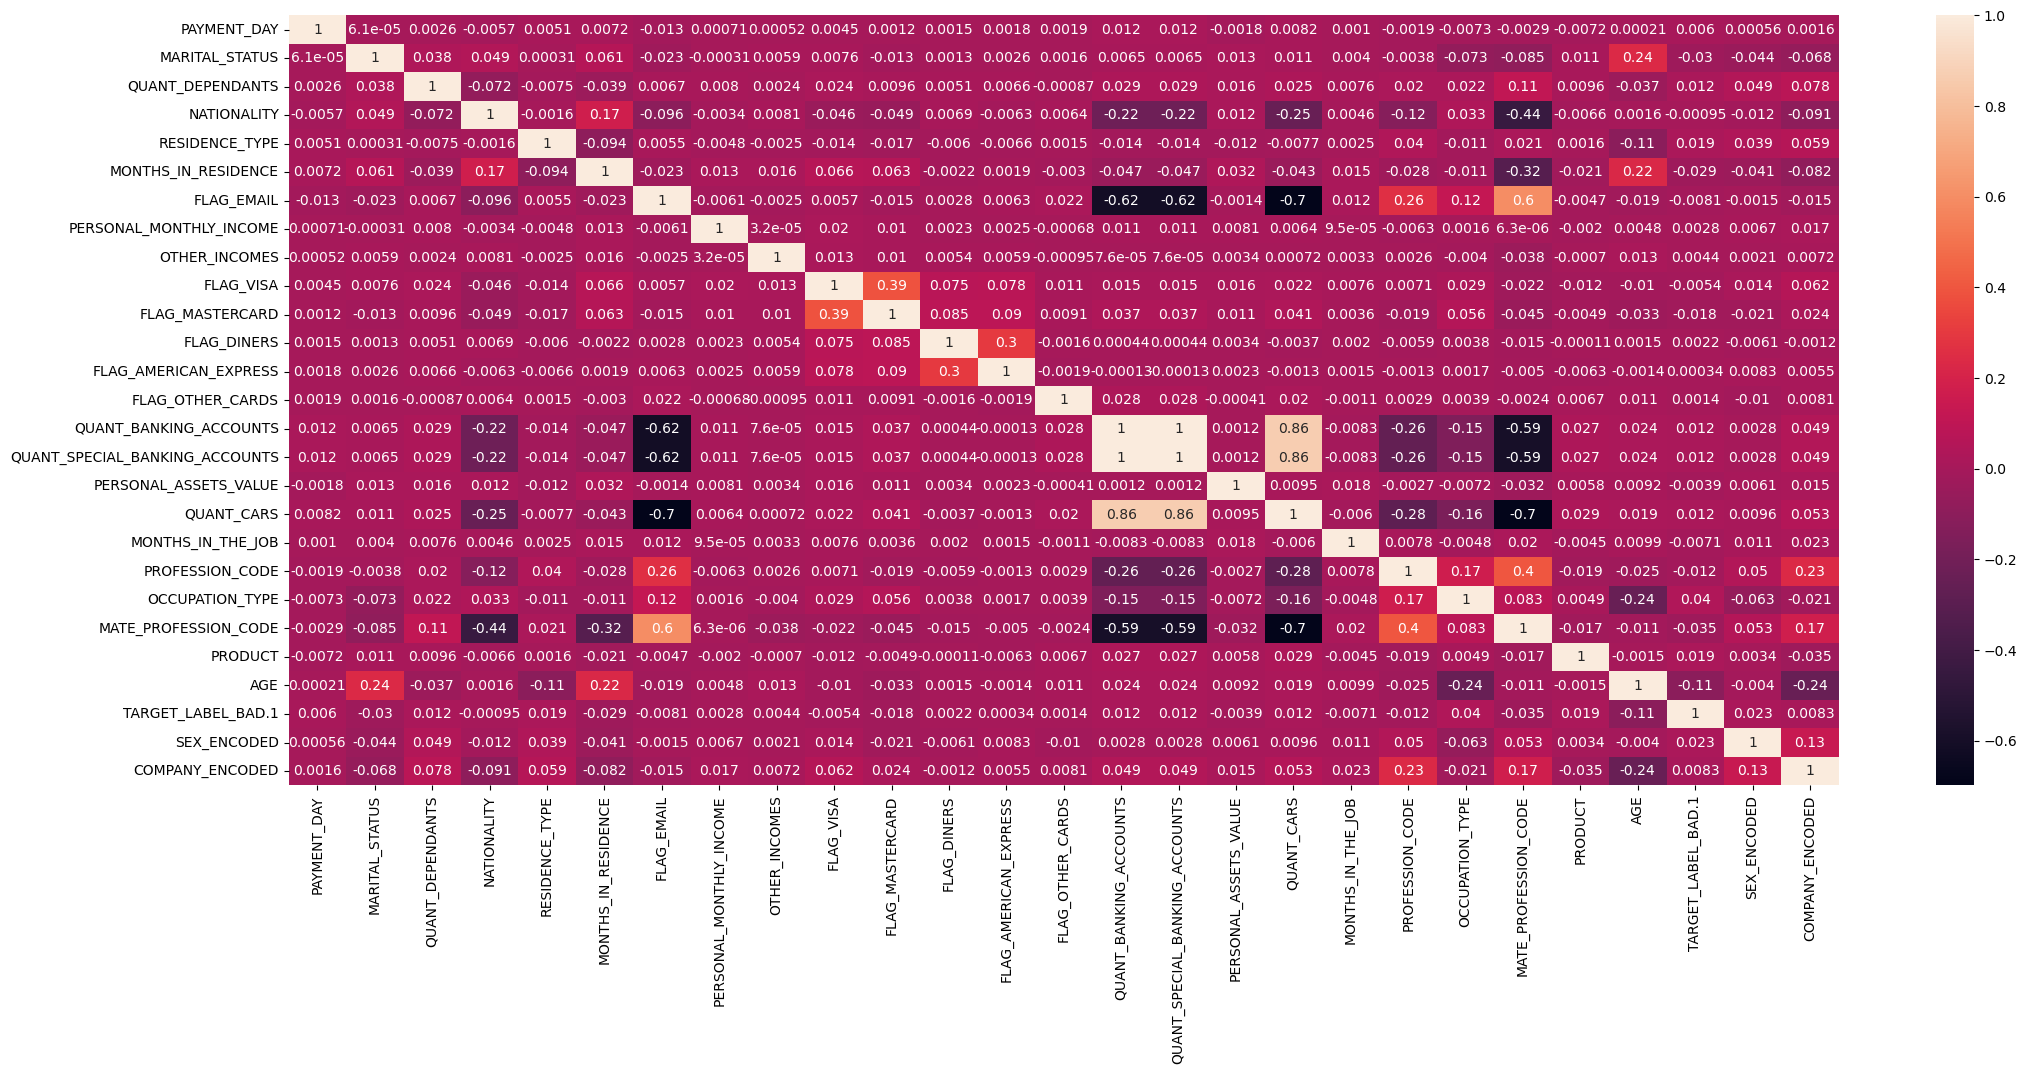

In [121]:
## Correlation heatmap

corr_matrix = data.corr()
sns.heatmap(corr_matrix,annot=True)
plt.rcParams['figure.figsize']=(50,20)

Based on correlation heatmap, correlation threshold of 0.59 was considered to define high correlation between features. 

It can be observed that, "QUANT_SPECIAL_BANKING_ACCOUNTS", "MATE_PROFESSION_CODE", "QUANT_CARS" have high correlation with "QUANT_BANKING_ACCOUNTS". Hence, to avoid multi-collinearity, "QUANT_CARS", "QUANT_SPECIAL_BANKING_ACCOUNTS", "MATE_PROFESSION_CODE" were dropped.

Note: "QUANT_SPECIAL_BANKING_ACCOUNTS" & "QUANT_BANKING_ACCOUNTS" had the exact same values.

In [122]:
data.drop(["QUANT_SPECIAL_BANKING_ACCOUNTS","MATE_PROFESSION_CODE","QUANT_CARS"],axis=1,inplace=True)

### 2.4) Imputation of missing values and handling irregular records

#### I) Imputation

In [123]:
## "RESIDENCE_TYPE", "MONTHS_IN_RESIDENCE", "PROFESSION_CODE", "OCCUPATION_TYPE" features comprise of missing values
data.isna().sum()

PAYMENT_DAY                   0
MARITAL_STATUS                0
QUANT_DEPENDANTS              0
NATIONALITY                   0
RESIDENCE_TYPE             1349
MONTHS_IN_RESIDENCE        3777
FLAG_EMAIL                    0
PERSONAL_MONTHLY_INCOME       0
OTHER_INCOMES                 0
FLAG_VISA                     0
FLAG_MASTERCARD               0
FLAG_DINERS                   0
FLAG_AMERICAN_EXPRESS         0
FLAG_OTHER_CARDS              0
QUANT_BANKING_ACCOUNTS        0
PERSONAL_ASSETS_VALUE         0
MONTHS_IN_THE_JOB             0
PROFESSION_CODE            7756
OCCUPATION_TYPE            7313
PRODUCT                       0
AGE                           0
TARGET_LABEL_BAD.1            0
SEX_ENCODED                   0
COMPANY_ENCODED               0
dtype: int64

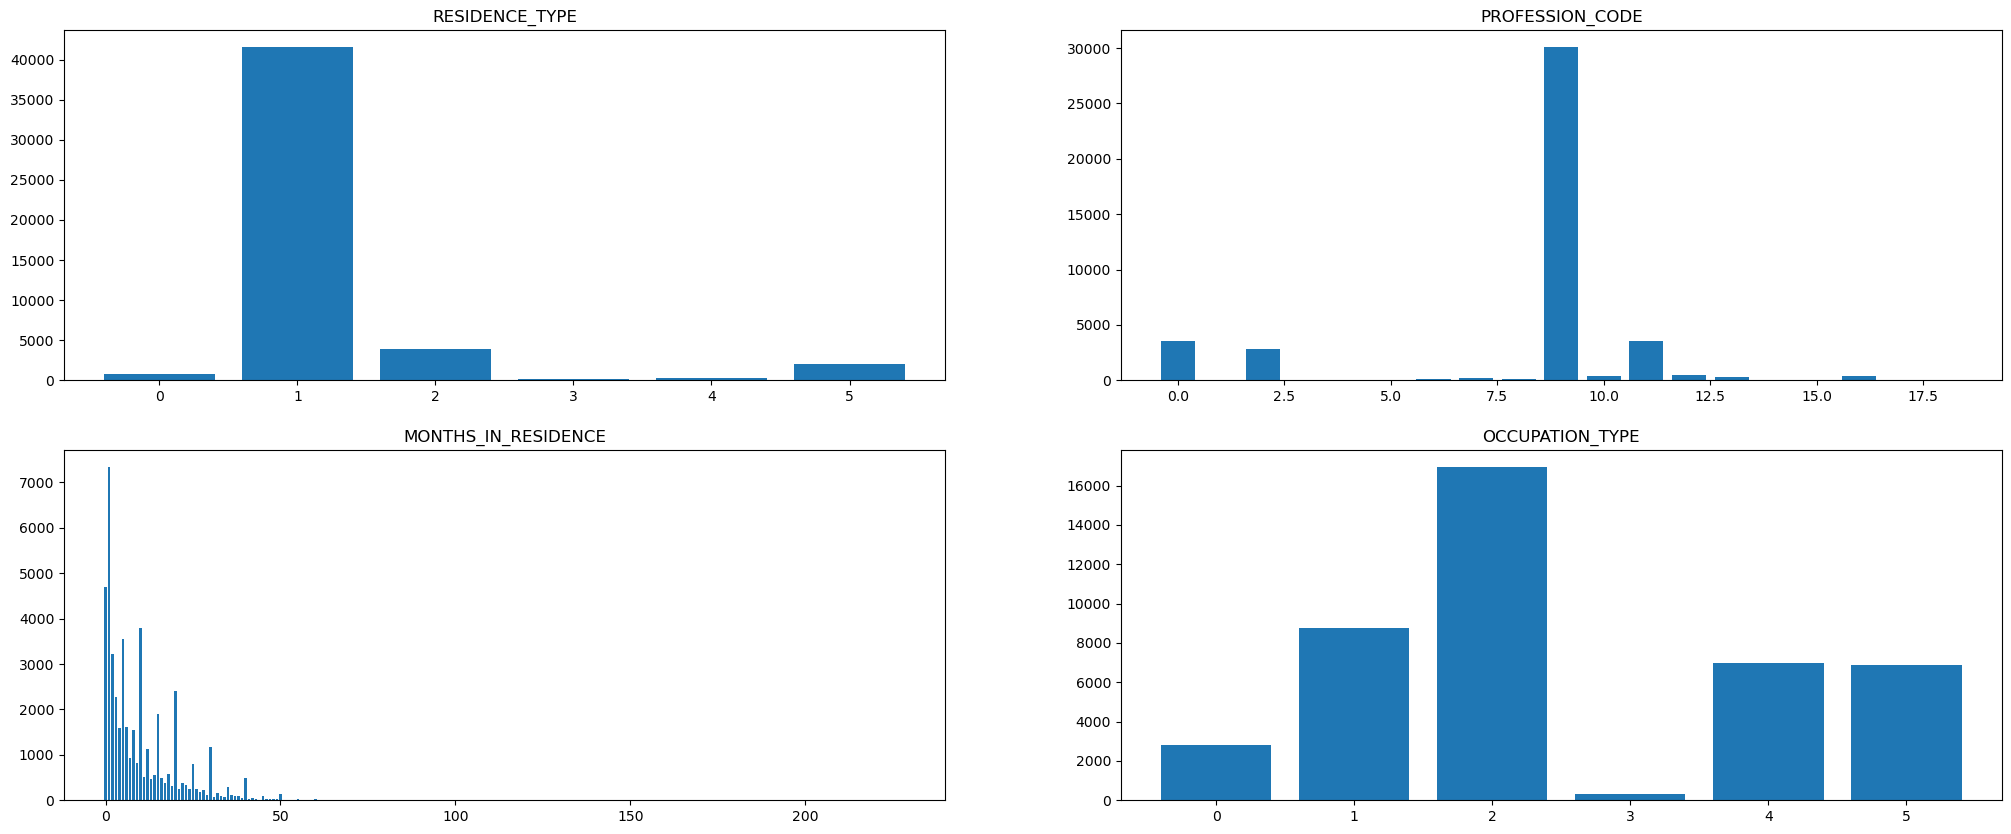

In [124]:
columns_to_plot = ['RESIDENCE_TYPE', 'PROFESSION_CODE', 'MONTHS_IN_RESIDENCE', 'OCCUPATION_TYPE']

plt.rcParams['figure.figsize'] = (25, 10)

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 2, i) 
    count = data[column].value_counts()
    plt.bar(count.index, count.values)
    plt.title(column)

plt.show()

In [125]:
data.describe()

,PAYMENT_DAY,MARITAL_STATUS,QUANT_DEPENDANTS,NATIONALITY,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,...,QUANT_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,MONTHS_IN_THE_JOB,PROFESSION_CODE,OCCUPATION_TYPE,PRODUCT,AGE,TARGET_LABEL_BAD.1,SEX_ENCODED,COMPANY_ENCODED
count,50000.000000,50000.00000,50000.000000,50000.000000,48651.000000,46223.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,5.000000e+04,50000.000000,42244.000000,42687.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.00000
mean,-167.151640,2.14840,0.650520,0.961600,1.252225,9.727149,0.802280,886.678437,35.434760,0.111440,...,0.357840,2.322372e+03,0.009320,8.061784,2.484316,1.275700,43.24852,0.260820,0.385200,0.44082
std,4239.371262,1.32285,1.193655,0.202105,0.867833,10.668841,0.398284,7846.959327,891.515142,0.314679,...,0.479953,4.235798e+04,0.383453,3.220104,1.532261,0.988286,14.98905,0.439086,0.489312,0.49649
min,-99999.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,6.00000,0.000000,0.000000,0.00000
25%,10.000000,1.00000,0.000000,1.000000,1.000000,1.000000,1.000000,360.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,9.000000,1.000000,1.000000,31.00000,0.000000,0.000000,0.00000
50%,10.000000,2.00000,0.000000,1.000000,1.000000,6.000000,1.000000,500.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,9.000000,2.000000,1.000000,41.00000,0.000000,0.000000,0.00000
75%,15.000000,2.00000,1.000000,1.000000,1.000000,15.000000,1.000000,800.000000,0.000000,0.000000,...,1.000000,0.000000e+00,0.000000,9.000000,4.000000,1.000000,53.00000,1.000000,1.000000,1.00000
max,25.000000,7.00000,53.000000,2.000000,5.000000,228.000000,1.000000,959000.000000,194344.000000,1.000000,...,2.000000,6.000000e+06,35.000000,18.000000,5.000000,7.000000,106.00000,1.000000,2.000000,1.00000


Based on the bar graphs and feature statistics, the missing values were imputed with the values occuring most frequently in the respective columns as mentioned bwlow.

"RESIDENCE_TYPE": Imputed with "1" because 83% of the data has 1 as the entry  
"PROFESSION_CODE": Imputed with "9" because 60% of the data has 9 as the entry  
"MONTHS_IN_RESIDENCE": Imputed with mean value (Mean (9.7) and Median (6) do not vary a lot)  
"OCCUPATION_TYPE": Imputed with "6" due to an almost uniform distribution. Thus, 6 is a new value introduced to classify the occupation of the missing entries

In [126]:
## Imputation process

data['RESIDENCE_TYPE'].fillna(1,inplace=True)
data['PROFESSION_CODE'].fillna(9,inplace=True)
data['MONTHS_IN_RESIDENCE'].fillna(data['MONTHS_IN_RESIDENCE'].mean(),inplace=True)
data['OCCUPATION_TYPE'].fillna(6,inplace=True)

#### II) Irregular records

The data.describe() table was leveraged to look through min, max, mean, median for all the continuous variables to identify anomalies. Features "PAYMENT_DAY" and "AGE" had irregular records which were handled as mentioned below

In [127]:
## "PAYMENT_DAY" feature: Removed 90 entries with "-99999" as the value since a payment day cannot be negative and
## the low n-size
data.drop(data[data['PAYMENT_DAY'] == -99999].index, axis=0, inplace=True)

In [128]:
## "AGE" feature: This feature comprises of values such as 6, 7, 14, 17. This is a plausible data entry error since legal age
## to get loan is 18 and above. These values along with the entry 43.248807854137446 were replaced with the mean age since
## the mean and median are almost equal.

#sorted(data['AGE'].unique())

In [129]:
## AGE values replaced
age_values_to_replace = [6, 7, 14, 17]
data['AGE'] = data['AGE'].replace(age_values_to_replace, data['AGE'].mean())

### 2.5) Outlier Check

As a part of data pre-processing, the presence of outliers was checked for continuous features such as "QUANT_DEPENDANTS", "MONTHS_IN_RESIDENCE", "PERSONAL_MONTHLY_INCOME", "OTHER_INCOMES", "PERSONAL_ASSETS_VALUE", "MONTHS_IN_THE_JOB", "AGE".

In [130]:
## Function to plot boxplot and check outliers using Interquartile Range (IQR)

def outlier_check(df, column):
    
    ## Plot the boxplot
    plt.boxplot(df[column])
    plt.rcParams['figure.figsize'] = (25,10)
    
    ## Define Q1, Q3, and IQR
    Q1 = min(df[column])
    Q3 = max(df[column])
    IQR = Q3 - Q1

    # Define a lower and upper bound to identify outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print("lower_bound: ",lower_bound)
    print("upper_bound: ",upper_bound)

    # Check if outliers are present. If a value is lesser than lower bound or higher than higher bound, it is an outlier 
    outlier_check = [i 
                 for i in df[column] if (i<=lower_bound or i>=upper_bound)]
    print("Outliers present in the data are: ", outlier_check)

lower_bound:  -114.0
upper_bound:  238.0
Outliers present in the data are:  []


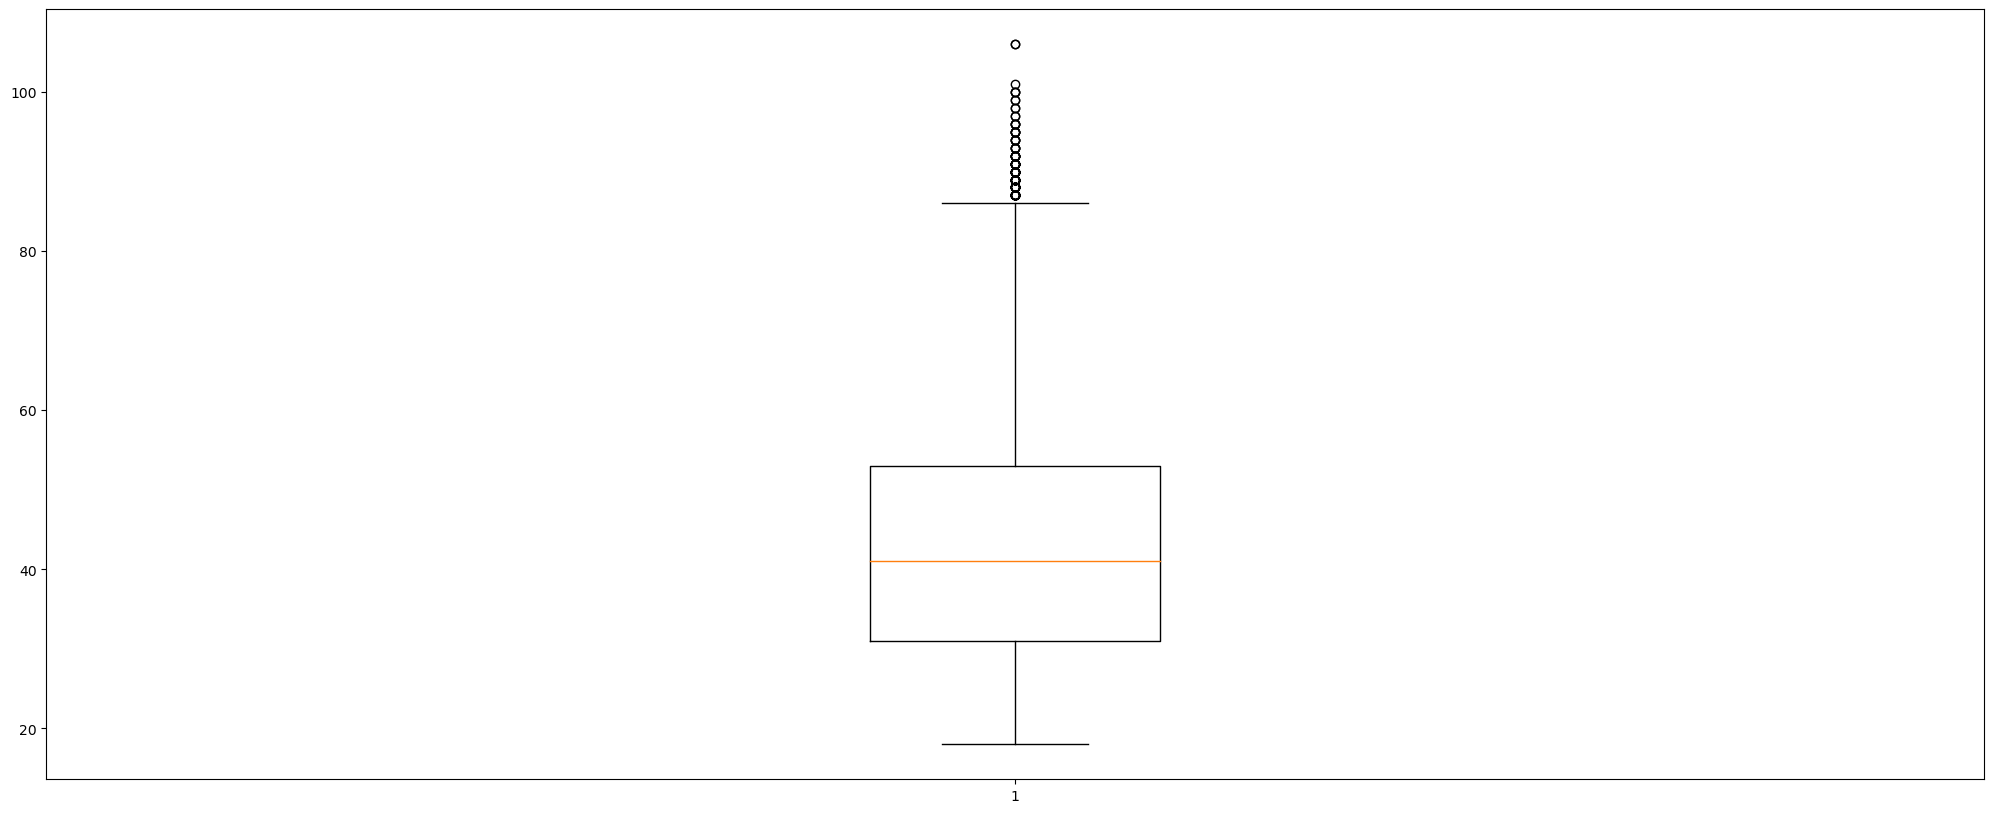

In [131]:
outlier_check(data, 'AGE')

*On calling the function for the above-mentioned continuous features, it can be observed that none of the features contain outliers since the 'outlier check' list is empty for all the continuous features.*

### 2.6) Feature Engineering (Creation of additional features for interpretability of model results)

To intepret the results from the model, additional features were created to bin continuous features i.e., "QUANT_DEPENDANTS", "MONTHS_IN_RESIDENCE", "PERSONAL_MONTHLY_INCOME", "OTHER_INCOMES", "PERSONAL_ASSETS_VALUE", "MONTHS_IN_THE_JOB", "AGE".  
It can be observed that except for "AGE" other features had a skewed distribution and hence, were not binned.

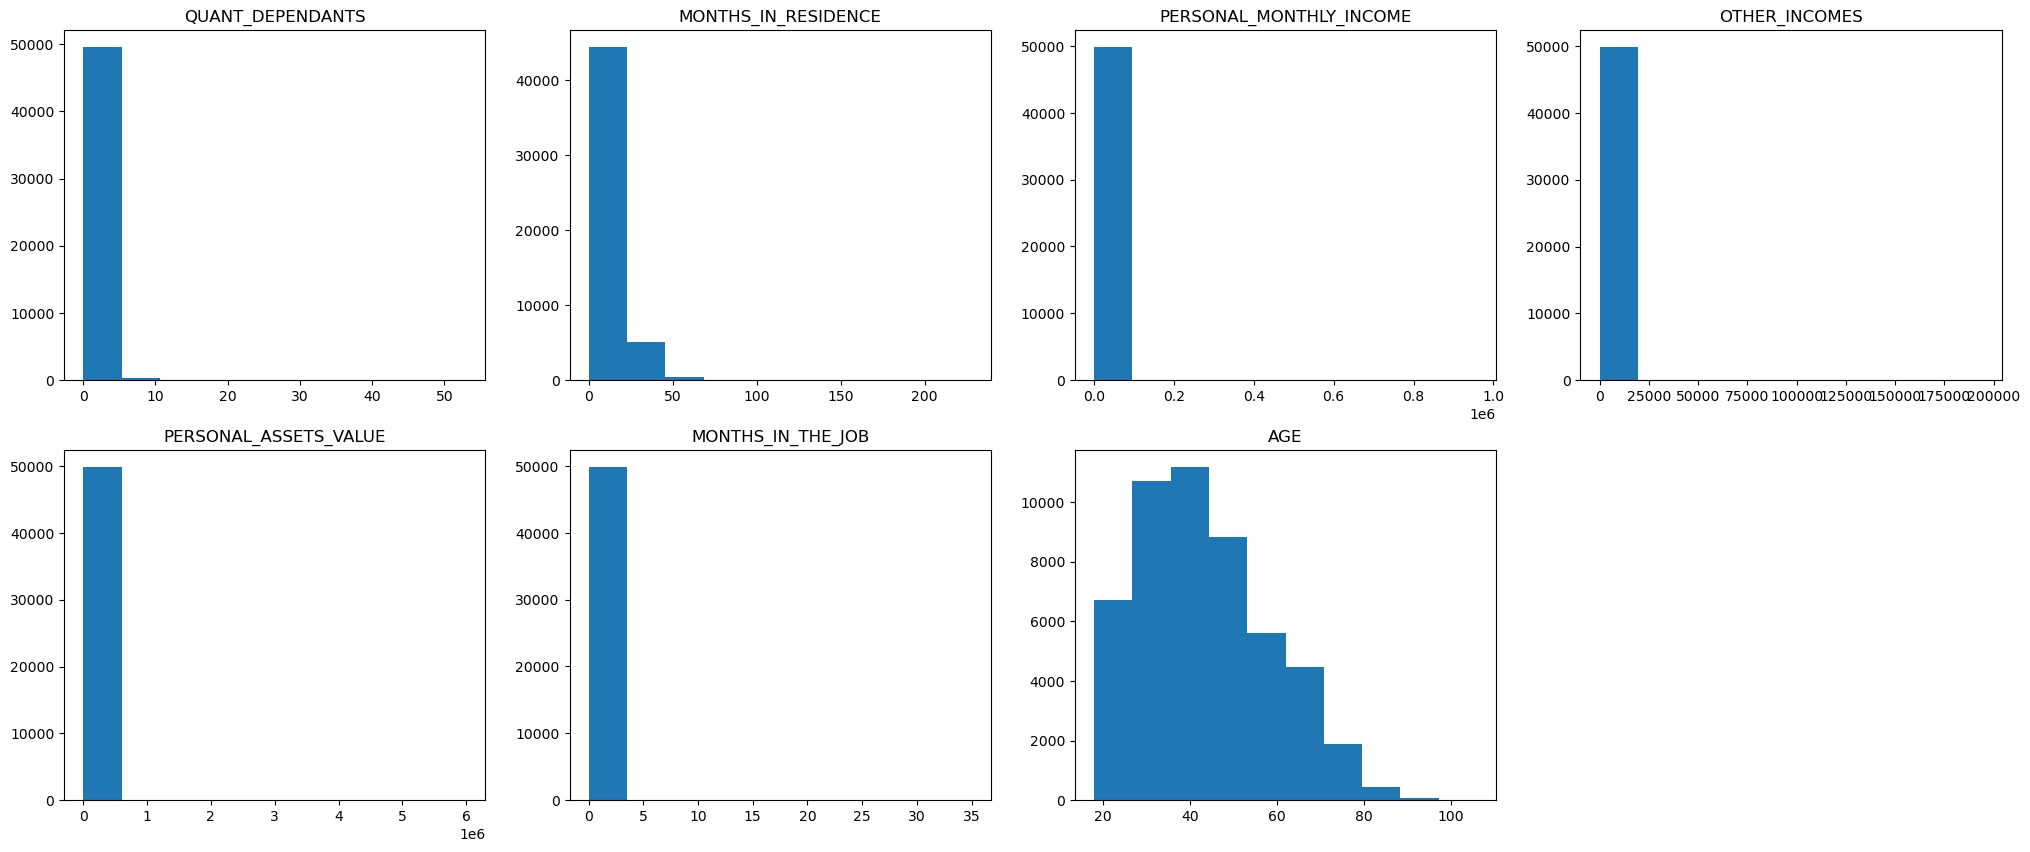

In [132]:
## Histogram plot

columns_to_plot = ["QUANT_DEPENDANTS", "MONTHS_IN_RESIDENCE", "PERSONAL_MONTHLY_INCOME", "OTHER_INCOMES", "PERSONAL_ASSETS_VALUE", "MONTHS_IN_THE_JOB", "AGE"]

plt.rcParams['figure.figsize'] = (25, 10)

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 4, i) 
    plt.hist(data[column],bins=10)
    plt.title(column)

plt.show()

In [133]:
## Binning the feature "AGE"

data['AGE_Groups'] = pd.cut(data['AGE'], bins=10, right=False)

## 3) Data for Modelling

In [134]:
data.head()

,PAYMENT_DAY,MARITAL_STATUS,QUANT_DEPENDANTS,NATIONALITY,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,...,PERSONAL_ASSETS_VALUE,MONTHS_IN_THE_JOB,PROFESSION_CODE,OCCUPATION_TYPE,PRODUCT,AGE,TARGET_LABEL_BAD.1,SEX_ENCODED,COMPANY_ENCODED,AGE_Groups
91,10,2,0,1,1.0,9.727149,1,351.0,0.0,0,...,0.0,0,9.0,6.0,1,63.0,0,0.0,0,"[62.0, 70.8)"
92,25,1,0,1,1.0,1.000000,1,394.0,0.0,0,...,0.0,0,9.0,2.0,1,25.0,0,0.0,1,"[18.0, 26.8)"
93,10,1,0,1,1.0,10.000000,1,800.0,0.0,0,...,0.0,0,9.0,6.0,1,24.0,0,0.0,0,"[18.0, 26.8)"
94,1,2,0,1,1.0,10.000000,1,764.0,0.0,0,...,0.0,0,9.0,2.0,1,40.0,0,0.0,0,"[35.6, 44.4)"
95,15,2,2,1,1.0,33.000000,0,671.0,0.0,0,...,100000.0,0,9.0,4.0,1,32.0,0,1.0,0,"[26.8, 35.6)"


<div style="text-align: center;font-size: 20px; font-weight: bold;">
    This concludes the data pre-processing part
</div>

# Model 1: Decision Trees

### 1) Define data

In [135]:
## Read the data.

## 'AGE_Groups' is dropped since its categorical and dummy encoding this feature will not useful in modelling. This feature
## will be appended at the end of modelling to determine patterns in defaulters across differnet age groups.
data.head()

,PAYMENT_DAY,MARITAL_STATUS,QUANT_DEPENDANTS,NATIONALITY,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,...,PERSONAL_ASSETS_VALUE,MONTHS_IN_THE_JOB,PROFESSION_CODE,OCCUPATION_TYPE,PRODUCT,AGE,TARGET_LABEL_BAD.1,SEX_ENCODED,COMPANY_ENCODED,AGE_Groups
91,10,2,0,1,1.0,9.727149,1,351.0,0.0,0,...,0.0,0,9.0,6.0,1,63.0,0,0.0,0,"[62.0, 70.8)"
92,25,1,0,1,1.0,1.000000,1,394.0,0.0,0,...,0.0,0,9.0,2.0,1,25.0,0,0.0,1,"[18.0, 26.8)"
93,10,1,0,1,1.0,10.000000,1,800.0,0.0,0,...,0.0,0,9.0,6.0,1,24.0,0,0.0,0,"[18.0, 26.8)"
94,1,2,0,1,1.0,10.000000,1,764.0,0.0,0,...,0.0,0,9.0,2.0,1,40.0,0,0.0,0,"[35.6, 44.4)"
95,15,2,2,1,1.0,33.000000,0,671.0,0.0,0,...,100000.0,0,9.0,4.0,1,32.0,0,1.0,0,"[26.8, 35.6)"


### 2) Split data into X and y

In [136]:
## Split data into X and y

X = data.drop(['TARGET_LABEL_BAD.1','AGE_Groups'], axis=1)
y = data['TARGET_LABEL_BAD.1']

### 3) Train-Test-Split

In [137]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### 4) Class imbalance

In [138]:
## Check for class imbalance. The count of target values 0 & 1 imbalanced.
## Hence, the data is oversampled. Oversampling was preferred over undersampling to avoid overfitting and loss of data.

print(X_train.shape,y_train.shape)
print(y_train.value_counts())

(34937, 23) (34937,)
0    25776
1     9161
Name: TARGET_LABEL_BAD.1, dtype: int64


In [139]:
pip install -U imbalanced-learn                           ## Library to handle imbalanced dataset

Note: you may need to restart the kernel to use updated packages.


In [140]:
from imblearn.over_sampling import RandomOverSampler

# Create a RandomOverSampler object
ros = RandomOverSampler(random_state=42)

# Fit the RandomOverSampler to the training data and oversample it
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

In [141]:
print(X_train_resampled.shape, y_train_resampled.shape)
print(y_train_resampled.value_counts())

(51552, 23) (51552,)
0    25776
1    25776
Name: TARGET_LABEL_BAD.1, dtype: int64


## Model 1: Decision Trees

### I) Fit the model

For Decision Trees, there is no need to scale the features, as the features are considered separately in the branching

In [142]:
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier
#class_weight = {0: 1, 1: 5}
clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=3, min_samples_split=2, min_samples_leaf=1,
                            min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0)

# Train the classifier on the sampled training data
clf = clf.fit(X_train_resampled, y_train_resampled)

### II) K-fold cross validation

In [143]:
from sklearn.model_selection import cross_val_score, KFold

# Set k value. Note: Multiple values of k were tested and finally k=10 (Bias-Variance Tradeoff) - need to take a look.
k_fold = 10

# Create a KFold object
kf = KFold(n_splits=k_fold, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cross_val_scores_dt = cross_val_score(clf, X_train_resampled, y_train_resampled, cv=kf)

# Display the cross-validation scores
print(f"Cross-validation scores: {cross_val_scores_dt}")
print(f"Mean accuracy: {np.mean(cross_val_scores_dt)}")

Cross-validation scores: [0.56865787 0.571955   0.56217265 0.56178468 0.56605238 0.56023278
 0.56275461 0.55538312 0.5542192  0.56100873]
Mean accuracy: 0.5624221025629834


### III) Hyperparameter tuning

The below code shows the parameters associated with decision trees. Please note that hyperparameter tuning has been done in "Fit the Model" step while defining the model.

In [144]:
## Decision tree paramters that can be tuned

clf.get_params()

{'ccp_alpha': 0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

### IV) Model fit on Test Data

In [145]:
# Make predictions on the test data
y_pred_decision_tree = clf.predict(X_test)
y_pred_decision_tree

array([0, 0, 1, ..., 0, 1, 0])

### V) Performance Metrics

#### i) Accuracy Score

In [146]:
from sklearn.metrics import accuracy_score

# Evaluate the accuracy of the model on test data
print("Accuracy: ", accuracy_score(y_test, y_pred_decision_tree))

Accuracy:  0.5493221131369799


#### ii) Confusion Matrix

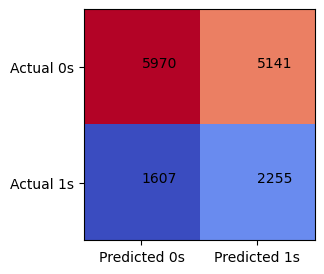

In [147]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_decision_tree)

fig, ax = plt.subplots(figsize=(8, 3))
ax.imshow(cm,cmap='coolwarm')
ax.grid(False)
ax.set_ylim(1.5, -0.5)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j])
plt.show()

#### iii) Classification Report

In [148]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_decision_tree))

              precision    recall  f1-score   support

           0       0.79      0.54      0.64     11111
           1       0.30      0.58      0.40      3862

    accuracy                           0.55     14973
   macro avg       0.55      0.56      0.52     14973
weighted avg       0.66      0.55      0.58     14973



#### iv) Precision, Recall

In [149]:
from sklearn.metrics import precision_score, recall_score
print("Precision: ",precision_score(y_test, y_pred_decision_tree))
print("Recall: ",recall_score(y_test, y_pred_decision_tree))

Precision:  0.3048945375878853
Recall:  0.5838943552563438


In [150]:
y_test.value_counts()

0    11111
1     3862
Name: TARGET_LABEL_BAD.1, dtype: int64

### VI) Feature Importance 

<Axes: >

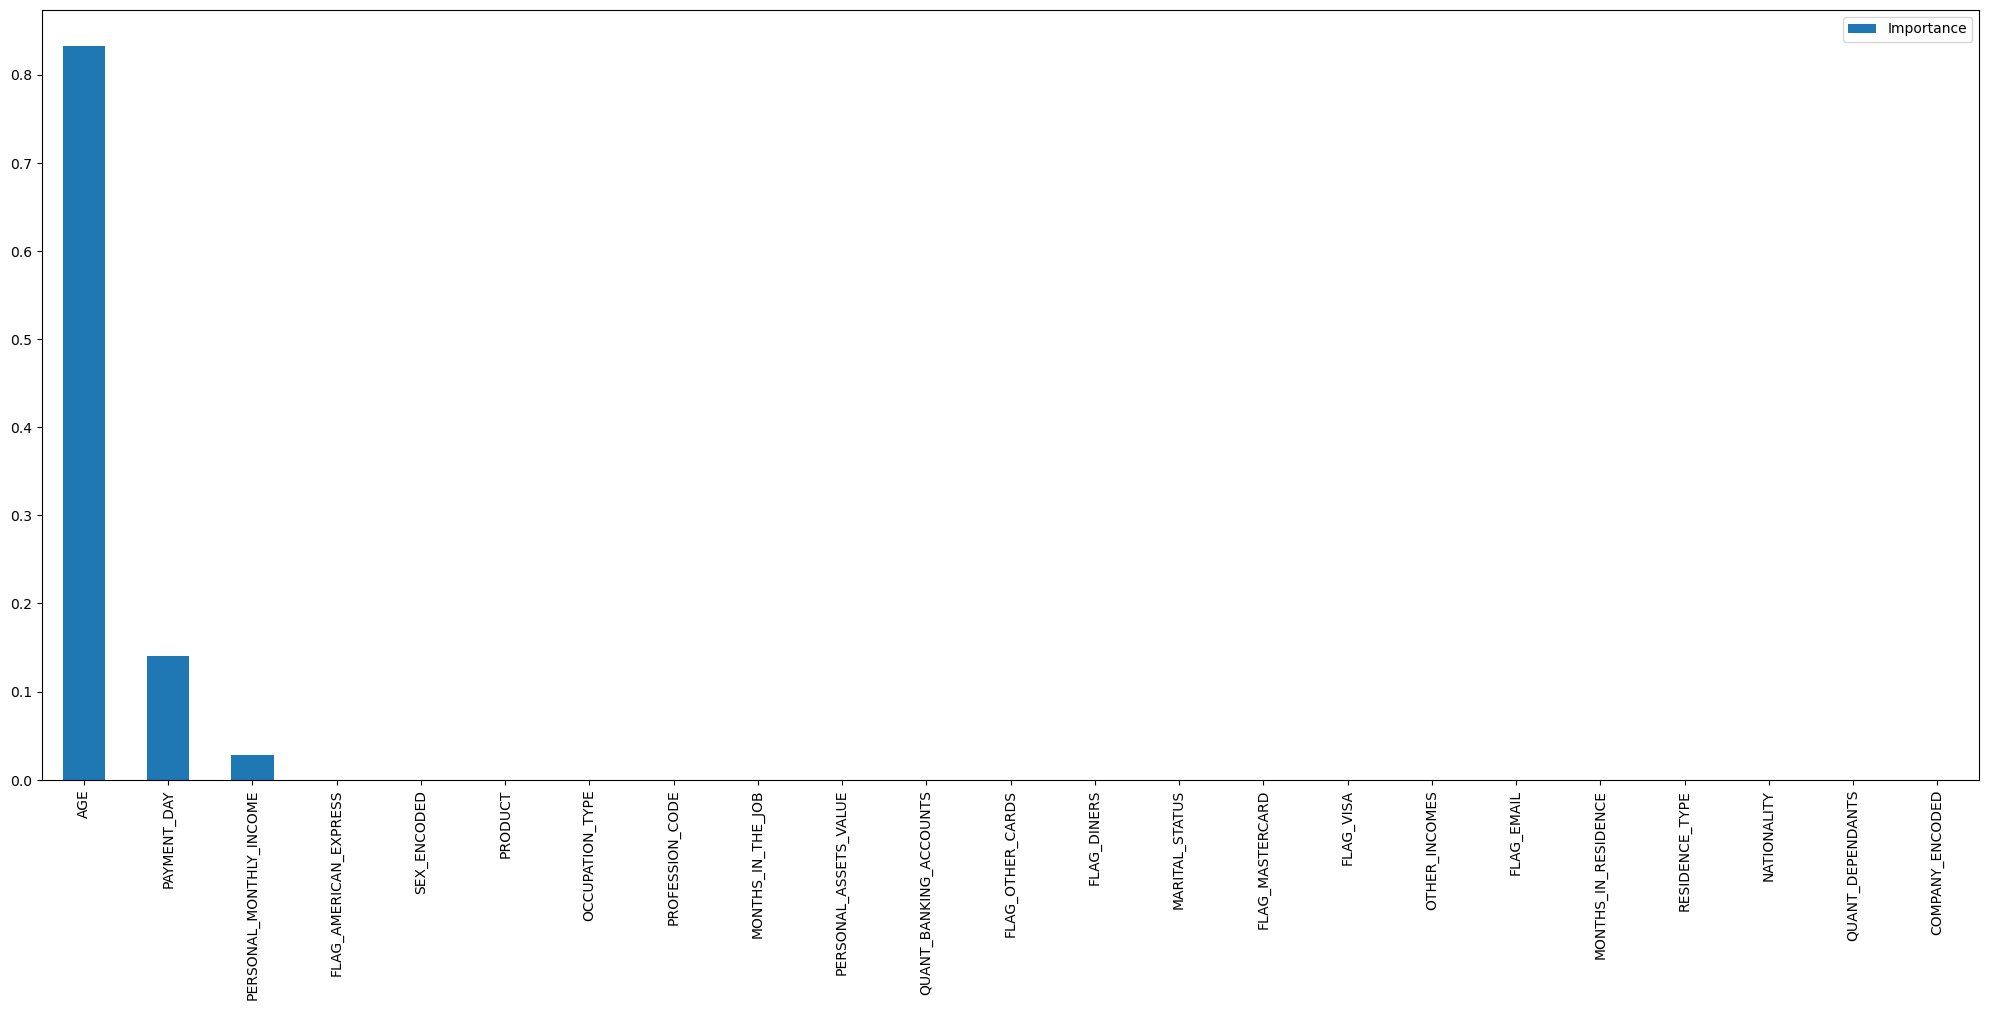

In [151]:
feature_names = X.columns

feature_importance = pd.DataFrame(clf.feature_importances_, index = feature_names,columns=['Importance']).sort_values(by='Importance',ascending=False)
feature_importance.plot(kind='bar')

### VII) Visualize decision tree

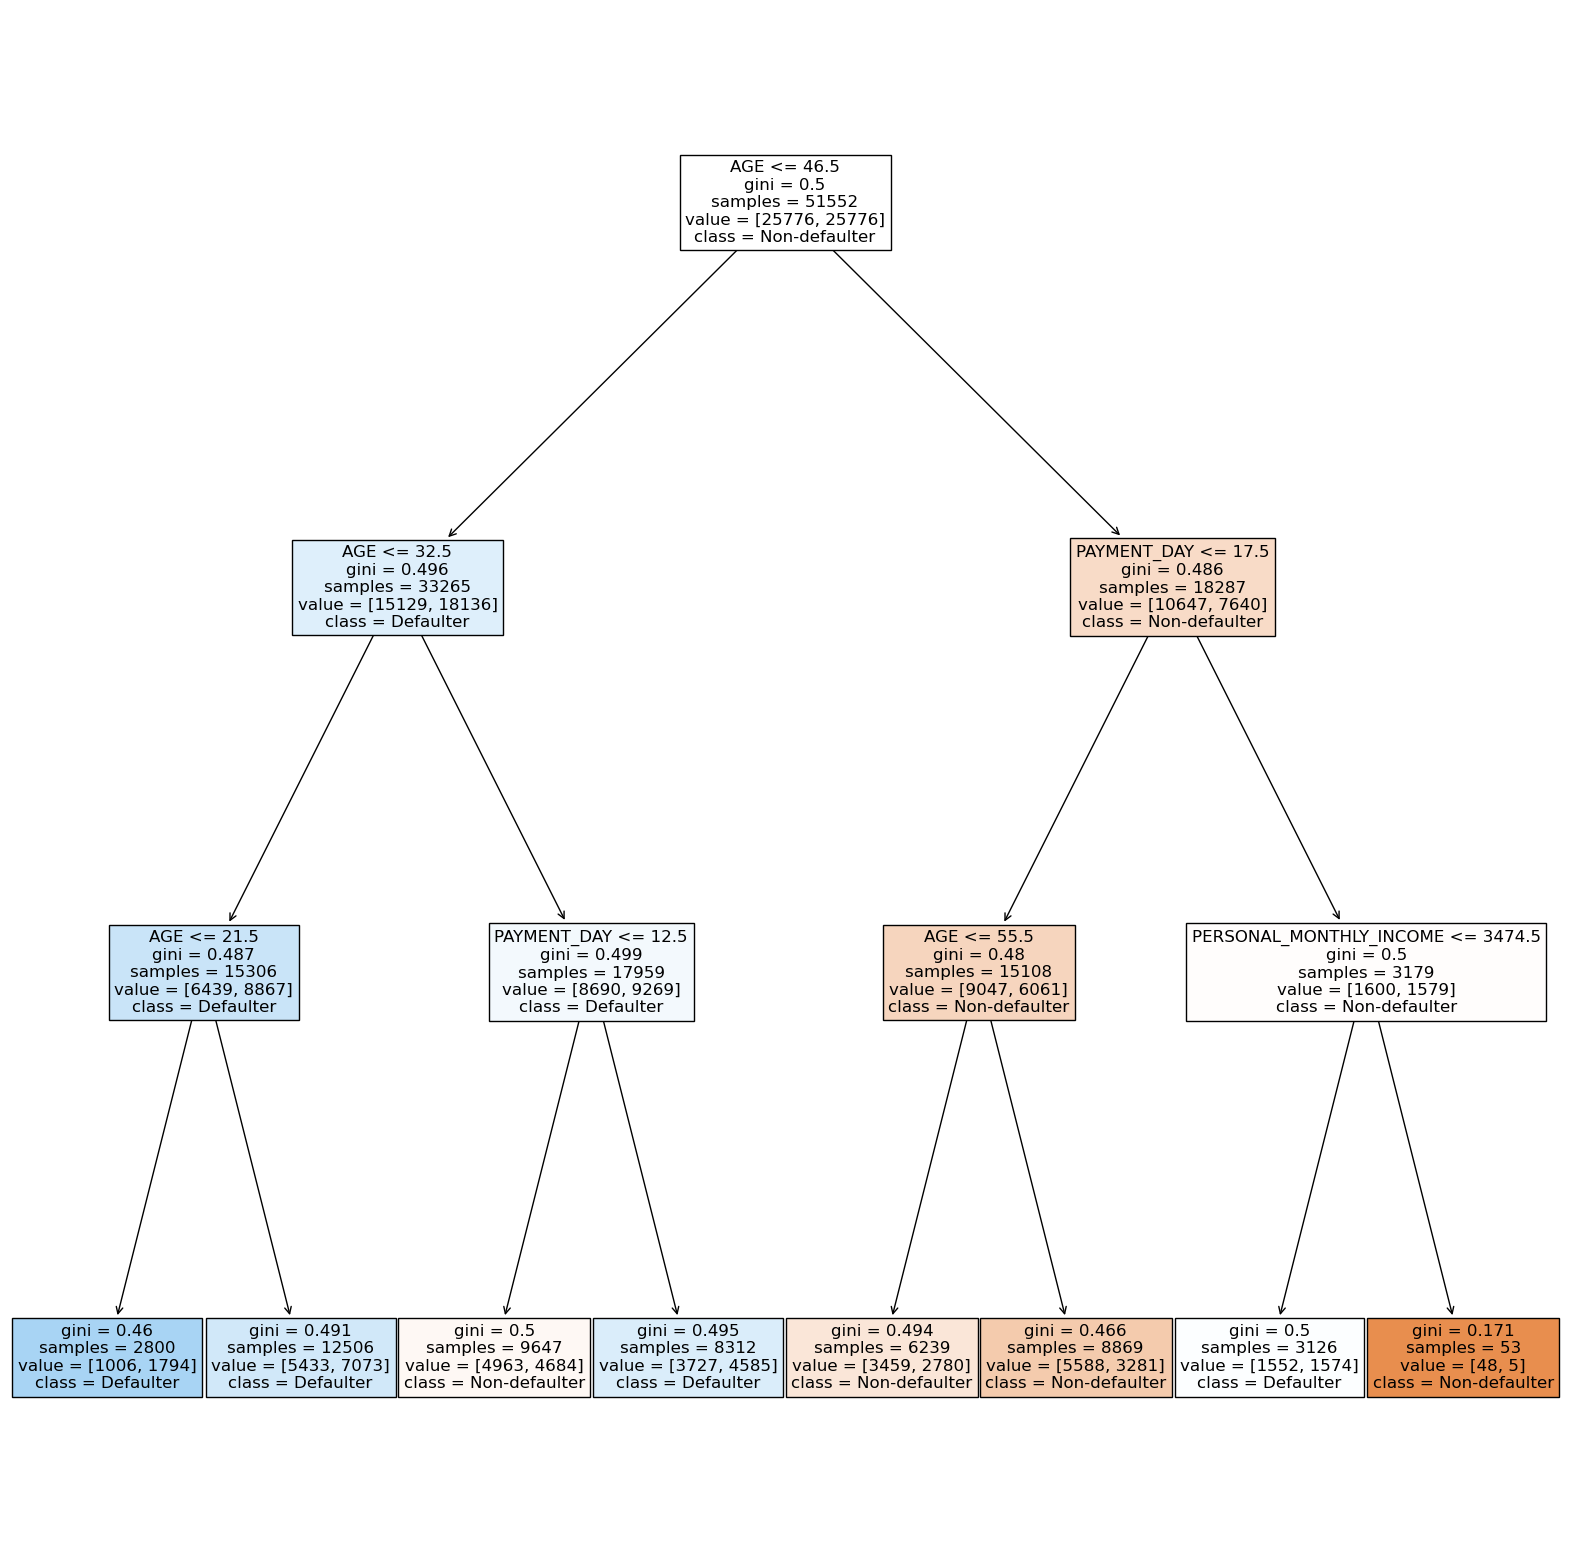

In [152]:
## Code to show the decision tree. This takes a while to run if the depth of the trees is considered default 

from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize = (20,20))
_ = tree.plot_tree(clf,
                feature_names = feature_names,
              class_names = {0: 'Non-defaulter', 1: 'Defaulter'},
            filled=True,
          fontsize=12)

### VIII) ROC and AUC Curve for model performance comparison

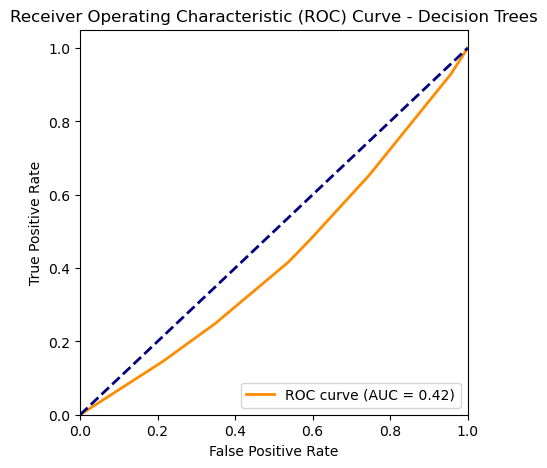

In [153]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the positive class (class 0)
y_pred_proba_decision_tree = clf.predict_proba(X_test)[:, 0]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_decision_tree)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Trees')
plt.legend(loc="lower right")
plt.show()

## Model 2: Random Forests

### I) Fit the model

Similar to Decision Trees, Random Forests do not require to scale the features, as the features are considered separately in the branching.

In [154]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

### II) K-fold cross validation

In [155]:
from sklearn.model_selection import cross_val_score, KFold

# Set k value. Multiple values of k were tried before finalizing k=10
k_fold = 10

# Create a KFold object
kf = KFold(n_splits=k_fold, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cross_val_scores_rf = cross_val_score(rf_model, X_train_resampled, y_train_resampled, cv=kf)

# Display the cross-validation scores
print(f"Cross-validation scores: {cross_val_scores_rf}")
print(f"Mean accuracy: {np.mean(cross_val_scores_rf)}")

Cross-validation scores: [0.90826222 0.91815361 0.9099903  0.91348206 0.91619787 0.90960233
 0.92124151 0.91774976 0.91096023 0.91270611]
Mean accuracy: 0.9138345991110336


### III) Hyperparameter tuning

The below code shows the parameters associated with random forests. Please note that hyperparameter tuning has been done in "Fit the Model" step while defining the model.

In [156]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

### IV) Model fit on Test Data

In [157]:
# Make predictions on the test data
y_pred_random_forest = rf_model.predict(X_test)
y_pred_random_forest

array([0, 1, 0, ..., 0, 0, 0])

### V) Performance Metrics

#### i) Accuracy Score

In [158]:
from sklearn.metrics import accuracy_score

# Evaluate the accuracy of the model on test data
print("Accuracy: ", accuracy_score(y_test, y_pred_random_forest))

Accuracy:  0.7072730915648167


#### ii) Confusion Matrix

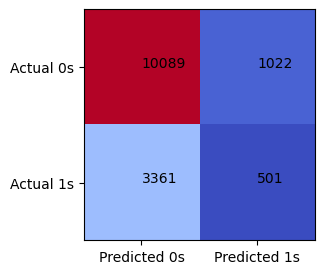

In [159]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_random_forest)

fig, ax = plt.subplots(figsize=(8, 3))
ax.imshow(cm,cmap='coolwarm')
ax.grid(False)
ax.set_ylim(1.5, -0.5)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j])
plt.show()

#### iii) Classification Report

In [160]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_random_forest))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82     11111
           1       0.33      0.13      0.19      3862

    accuracy                           0.71     14973
   macro avg       0.54      0.52      0.50     14973
weighted avg       0.64      0.71      0.66     14973



#### iv) Precision, Recall

In [161]:
from sklearn.metrics import precision_score, recall_score
print("Precision: ",precision_score(y_test, y_pred_random_forest))
print("Recall: ",recall_score(y_test, y_pred_random_forest))

Precision:  0.32895600787918583
Recall:  0.12972553081305024


In [162]:
y_test.value_counts()

0    11111
1     3862
Name: TARGET_LABEL_BAD.1, dtype: int64

### VI) Feature Importance 

<Axes: >

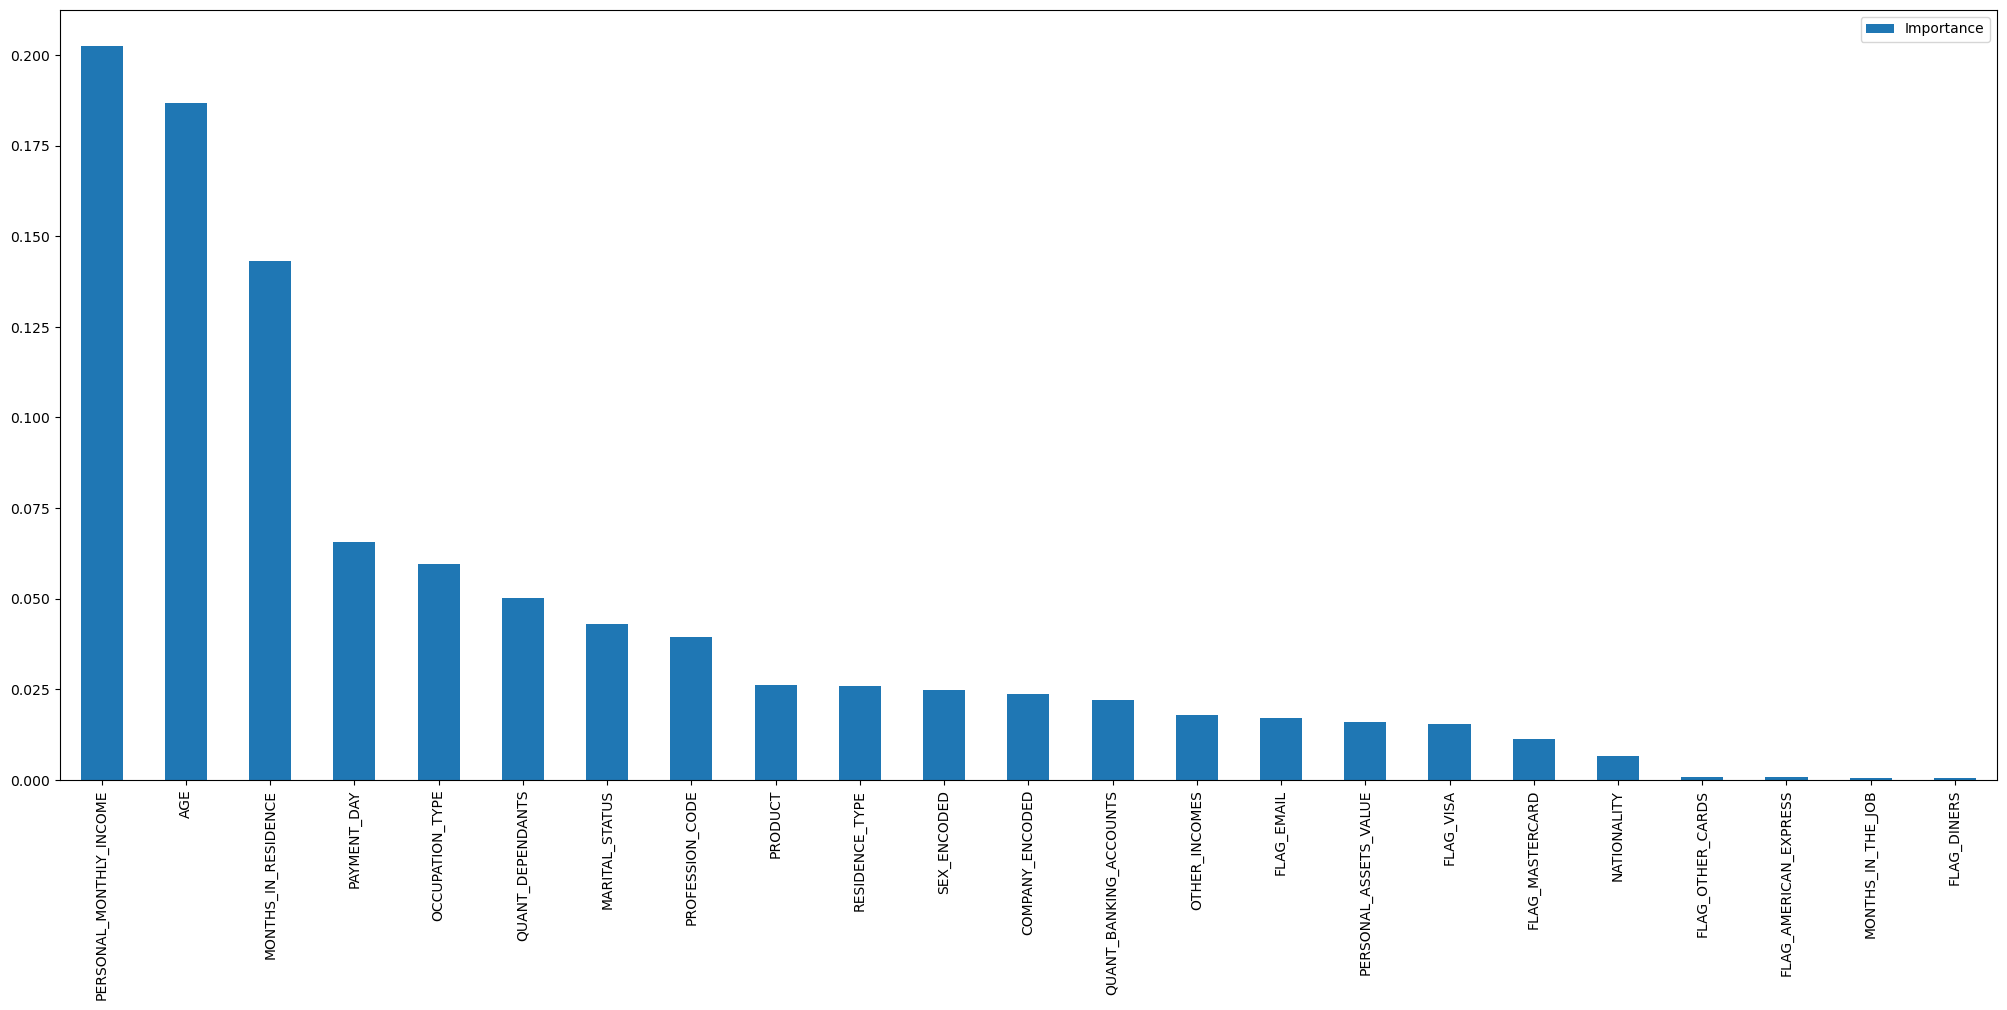

In [163]:
feature_names = X.columns

feature_importance = pd.DataFrame(rf_model.feature_importances_, index = feature_names,columns=['Importance']).sort_values(by='Importance',ascending=False)
feature_importance.plot(kind='bar')

### VII) ROC and AUC Curve for model performance comparison

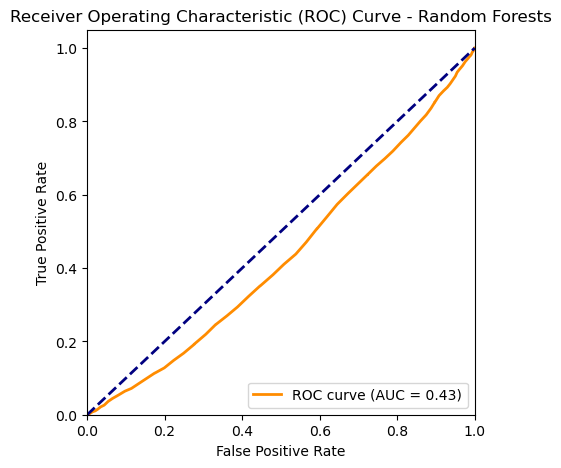

In [164]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the positive class (class 0)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 0]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_rf)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forests')
plt.legend(loc="lower right")
plt.show()

## Model 3: Logistic Regression

### I) Fit the model

Scaling is recommended for logistic regression since the it is sensitive towards scale differences.

In [165]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [166]:
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train_scaled, y_train_resampled)

LogisticRegression(random_state=42)

### II) K-fold cross validation

In [167]:
from sklearn.model_selection import cross_val_score, KFold

# Set k value. Multiple values of k were tried before finalizing k=10
k_fold = 10

# Create a KFold object
kf = KFold(n_splits=k_fold, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cross_val_scores_lg = cross_val_score(logreg_model, X_train_scaled, y_train_resampled, cv=kf)

# Display the cross-validation scores
print(f"Cross-validation scores: {cross_val_scores_lg}")
print(f"Mean accuracy: {np.mean(cross_val_scores_lg)}")

Cross-validation scores: [0.56342126 0.57176106 0.56178468 0.57361785 0.56818623 0.57167798
 0.57555771 0.55906887 0.56256062 0.57051406]
Mean accuracy: 0.567815030411021


### III) Hyperparameter tuning

The below code shows the parameters associated with logistic regression. Please note that hyperparameter tuning has been done in "Fit the Model" step while defining the model.

In [168]:
logreg_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

### IV) Model fit on Test Data

In [169]:
# Make predictions on the test data
y_pred_logreg = logreg_model.predict(X_test_scaled)
y_pred_logreg

array([0, 0, 1, ..., 0, 1, 0])

### V) Performance Metrics

#### i) Accuracy Score

In [170]:
from sklearn.metrics import accuracy_score

# Evaluate the accuracy of the model on test data
print("Accuracy: ", accuracy_score(y_test, y_pred_logreg))

Accuracy:  0.5405730314566219


#### ii) Confusion Matrix

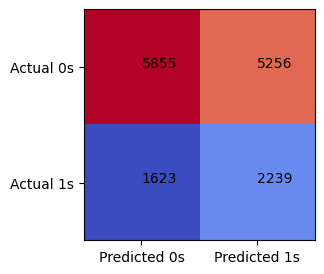

In [171]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_logreg)

fig, ax = plt.subplots(figsize=(8, 3))
ax.imshow(cm,cmap='coolwarm')
ax.grid(False)
ax.set_ylim(1.5, -0.5)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j])
plt.show()

#### iii) Classification Report

In [172]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_logreg))

              precision    recall  f1-score   support

           0       0.78      0.53      0.63     11111
           1       0.30      0.58      0.39      3862

    accuracy                           0.54     14973
   macro avg       0.54      0.55      0.51     14973
weighted avg       0.66      0.54      0.57     14973



#### iv) Precision, Recall

In [173]:
from sklearn.metrics import precision_score, recall_score
print("Precision: ",precision_score(y_test, y_pred_logreg))
print("Recall: ",recall_score(y_test, y_pred_logreg))

Precision:  0.2987324883255504
Recall:  0.5797514241325737


In [174]:
y_test.value_counts()

0    11111
1     3862
Name: TARGET_LABEL_BAD.1, dtype: int64

### VI) ROC and AUC Curve for model performance comparison

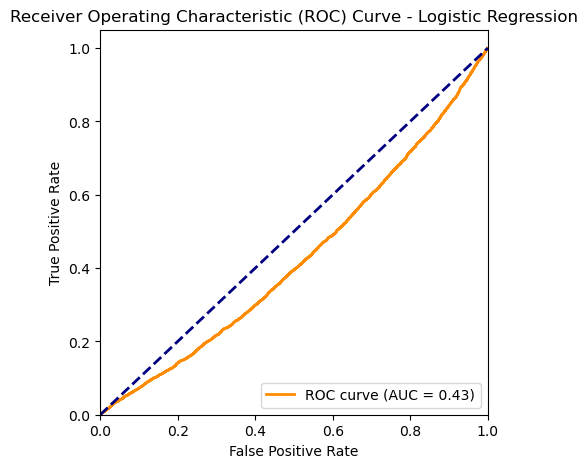

In [175]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the positive class (class 0)
y_pred_proba_logreg = logreg_model.predict_proba(X_test_scaled)[:, 0]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_logreg)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

### Logistic Regression - Lasso

In [176]:
from numpy import arange
from sklearn.model_selection import GridSearchCV

lasso_logistic_model = LogisticRegression(
    penalty='l1', # L1 penalty refers to Lasso regression (L2 would be ridge regression and 'elasticnet' elastic net)
    solver='liblinear') # we choose this solver here because it's the fastest for small datasets


# Let's now look for the optimal value of lambda:

grid = dict() 
grid['C'] = arange(0.0001, 1, 0.01)

# 5-fold cross validation, evaluating by model accuracy
search = GridSearchCV(lasso_logistic_model, grid, scoring='accuracy', cv=5, refit=True)
results = search.fit(X_train_scaled, y_train_resampled)

# Lambda value
print('Config: %s' % results.best_params_)

Config: {'C': 0.0201}


In [177]:
# Coefficients of the lasso-logistic model
lasso_model = LogisticRegression(
    penalty='l1', # Lasso regression
    solver='liblinear',
    C = 0.0201).fit(X_train_scaled,y_train_resampled) #here is your new penalty term from before
print("Coefficients of the lasso logistic model: \n\n",lasso_model.coef_)

# Coefficients of the traditional logistic model
logistic_model = LogisticRegression( # use the same model
    penalty='none').fit(X_train_scaled,y_train_resampled) # but without the penalty
print("\n\n Coefficients of the traditional logistic model: \n\n",logistic_model.coef_)

Coefficients of the lasso logistic model: 

 [[ 0.11701078 -0.0096169   0.03902957  0.          0.03251379 -0.00226546
   0.          0.00276009  0.01857364  0.01100194 -0.07435556  0.01199359
   0.00513377  0.00155323  0.03866328 -0.00470925 -0.02943398 -0.0249774
   0.03628531  0.02113018 -0.24809694  0.06463404 -0.05652574]]


 Coefficients of the traditional logistic model: 

 [[ 0.12060898 -0.01332901  0.0434099   0.00597934  0.03667134 -0.00553263
   0.0087002   0.00698649  0.0296241   0.01754641 -0.08128235  0.01495229
   0.00821353  0.00505773  0.04979088 -0.01025197 -0.0428505  -0.02801298
   0.04055548  0.02459905 -0.25074363  0.06912517 -0.06157755]]


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


In [178]:
# Predictions with the lasso-logistic model
predictions_tuned_model = lasso_model.predict(X_test_scaled)
print("Predictions of the Lasso logistic model: \n\n", predictions_tuned_model)

# Predictions with the standard logistic model
logistic_model = LogisticRegression(solver='liblinear').fit(X_train_scaled,y_train_resampled)
predictions_non_tuned_model = logistic_model.predict(X_test_scaled)
print("\n\n Predictions of the traditional logistic model: \n\n", predictions_non_tuned_model)

Predictions of the Lasso logistic model: 

 [0 0 1 ... 0 1 0]


 Predictions of the traditional logistic model: 

 [0 0 1 ... 0 1 0]


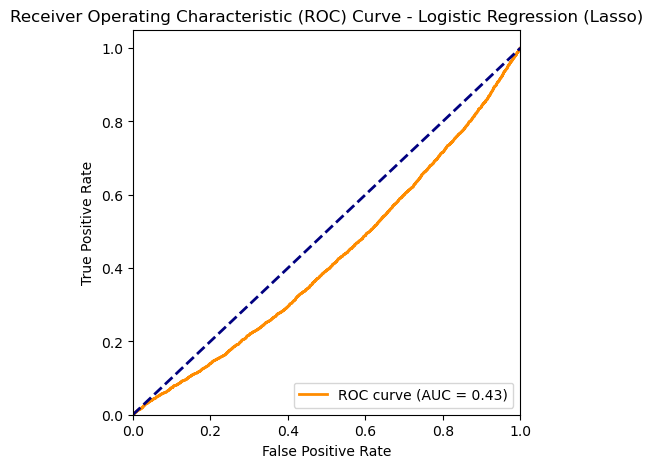

In [179]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the positive class (class 0)
y_pred_proba_lglasso = lasso_model.predict_proba(X_test_scaled)[:, 0]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_lglasso)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression (Lasso)')
plt.legend(loc="lower right")
plt.show()

## Model 4: KNN

### I) Fit the model

Scaling is recommended for KNN. Note: Oversampling of data has not been done for knn model since the best k value on oversampled data comes out to be 1. To avoid this, the original unsampled train data (X_train, y_train) has been used for fitting KNN model.

In [180]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [181]:
## GridSearch to find the optimal value of k (n_neighbours for KNN)

from sklearn.neighbors import KNeighborsClassifier

# Define the KNN classifier
knn = KNeighborsClassifier()

# Define the parameter grid to search
param_grid = {'n_neighbors': range(1, 21)} 

# Initialize GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit the model to the resampled training data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameter value
best_k = grid_search.best_params_['n_neighbors']
print(f"Best value of k: {best_k}")

# Evaluate the model with the best hyperparameter on the test set
#best_model = grid_search.best_estimator_

Best value of k: 20


In [182]:
# KNN Model with the k value obtained from GridSearchCV

knn_model = KNeighborsClassifier(n_neighbors=20)
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=20)

### II) K-fold cross validation

In [183]:
from sklearn.model_selection import cross_val_score, KFold

# Set k value. Multiple values of k were tried before finalizing k=10
k_fold = 10

# Create a KFold object
kf = KFold(n_splits=k_fold, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cross_val_scores_knn = cross_val_score(knn_model, X_train_scaled, y_train, cv=kf)

# Display the cross-validation scores
print(f"Cross-validation scores: {cross_val_scores_knn}")
print(f"Mean accuracy: {np.mean(cross_val_scores_knn)}")

Cross-validation scores: [0.72266743 0.73640527 0.74184316 0.72610189 0.73955352 0.72409845
 0.7384087  0.73174921 0.73232179 0.74892642]
Mean accuracy: 0.7342075843567091


### III) Hyperparameter tuning

The below code shows the parameters associated with knn. Please note that hyperparameter tuning has been done in "Fit the Model" step while defining the model.

In [184]:
knn_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 20,
 'p': 2,
 'weights': 'uniform'}

### IV) Model fit on Test Data

In [185]:
# Make predictions on the test data
y_pred_knn = knn_model.predict(X_test_scaled)
y_pred_knn

array([0, 0, 0, ..., 0, 0, 0])

### V) Performance Metrics

#### i) Accuracy Score

In [186]:
from sklearn.metrics import accuracy_score

# Evaluate the accuracy of the model on test data
print("Accuracy: ", accuracy_score(y_test, y_pred_knn))

Accuracy:  0.7370600414078675


#### ii) Confusion Matrix

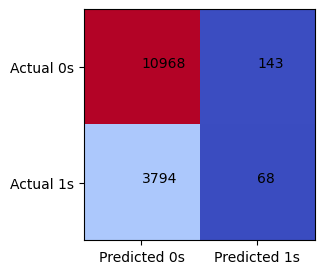

In [187]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_knn)

fig, ax = plt.subplots(figsize=(8, 3))
ax.imshow(cm,cmap='coolwarm')
ax.grid(False)
ax.set_ylim(1.5, -0.5)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j])
plt.show()

#### iii) Classification Report

In [188]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.74      0.99      0.85     11111
           1       0.32      0.02      0.03      3862

    accuracy                           0.74     14973
   macro avg       0.53      0.50      0.44     14973
weighted avg       0.63      0.74      0.64     14973



#### iv) Precision, Recall

In [189]:
from sklearn.metrics import precision_score, recall_score
print("Precision: ",precision_score(y_test, y_pred_knn))
print("Recall: ",recall_score(y_test, y_pred_knn))

Precision:  0.3222748815165877
Recall:  0.017607457276022784


### VI) ROC and AUC Curve for model performance comparison

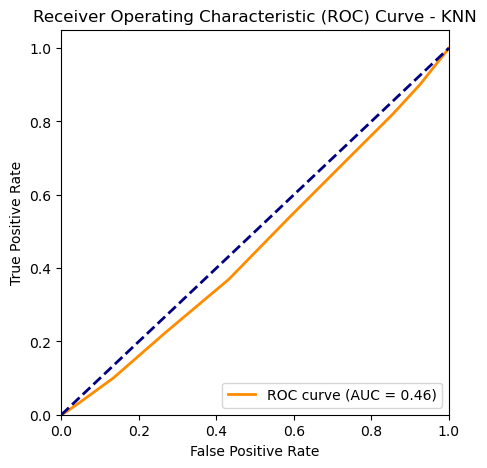

In [190]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the positive class (class 0)
y_pred_proba_knn = knn_model.predict_proba(X_test_scaled)[:, 0]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_knn)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - KNN')
plt.legend(loc="lower right")
plt.show()